### Architecture of Inception
The Inception architecture is composed of multiple Inception modules stacked on top of each other, followed by fully connected layers. Each Inception module consists of parallel convolutional and pooling layers of different sizes, allowing the network to capture diverse features at different scales.

### How Does Inception Work in CNN?
Inception works by processing input images through a series of Inception modules, each of which performs multiple convolutions and pooling operations in parallel. These operations capture different features of the input image, which are then concatenated to form the output of the module. This multi-scale approach allows the network to learn rich and varied feature representations.
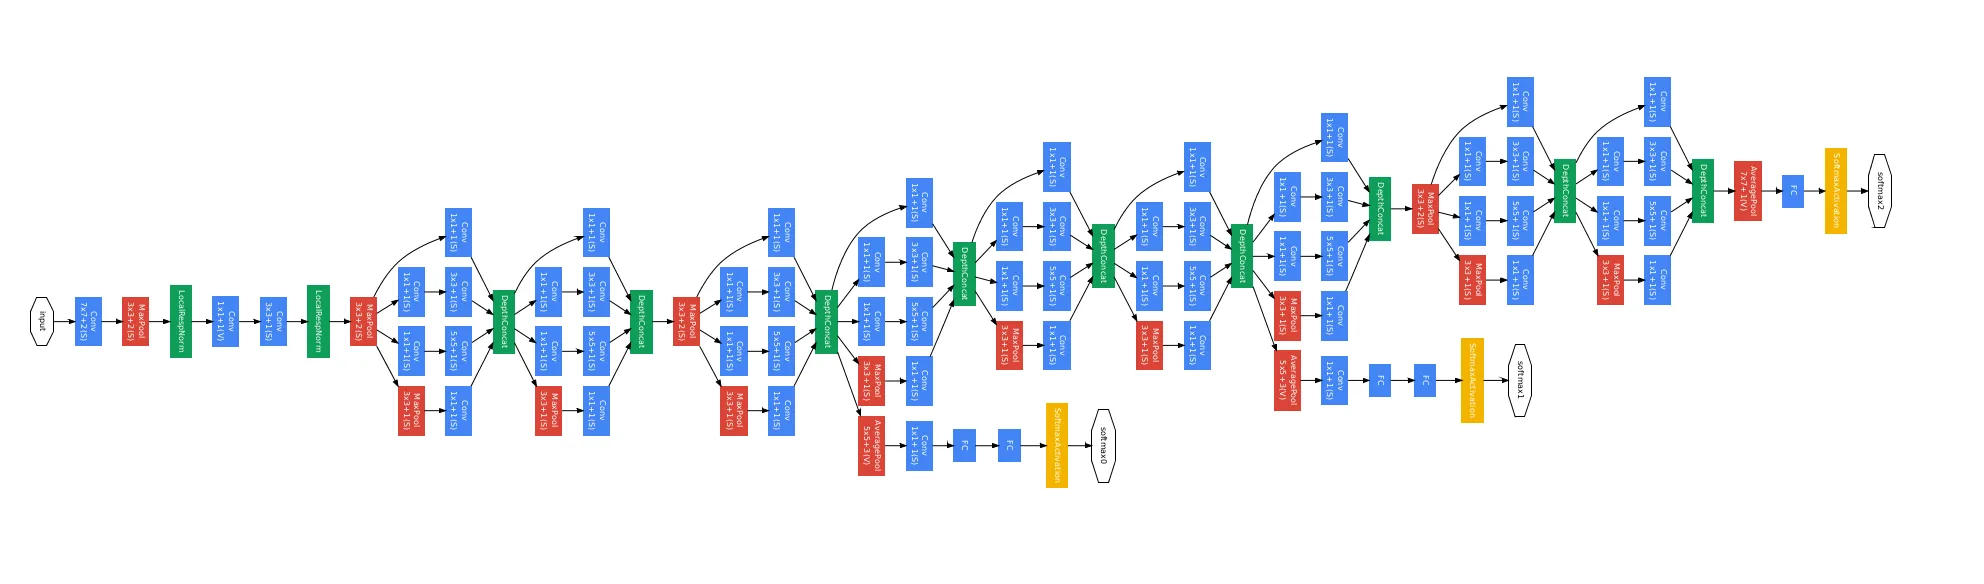

Inception network architecture makes it possible to use filters of multiple sizes without increasing the depth of the network. The different filters are added parallelly instead of being fully connected one after the other.
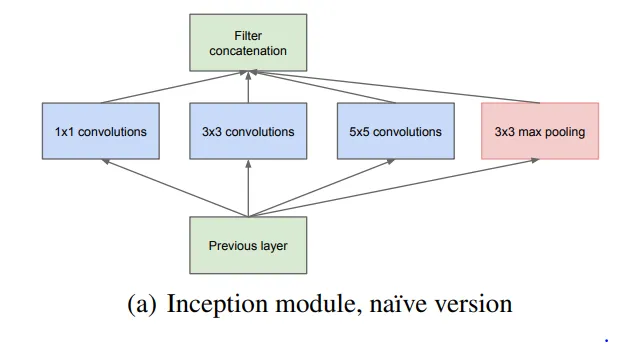

This is known as the naive version of the inception model. The problem with this model was the huge number of parameters. To mitigate the same, they came up with the below architecture.
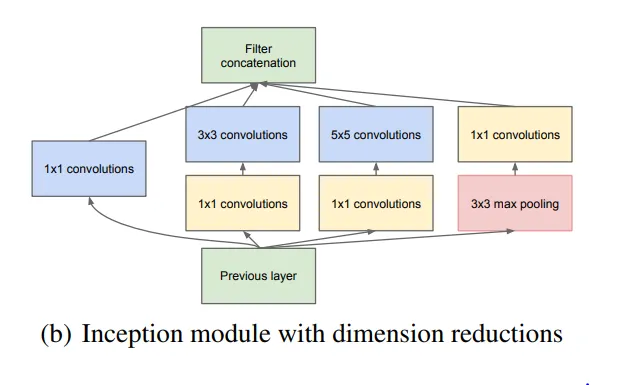

### How does this architecture reduce dimensionality?
Adding a 1X1 convolution before a 5X5 convolution would reduce the number of channels of the image when it is provided as an input to the 5X5 convolution, in turn reducing the number of parameters and the computational requirement.
Let me explain with an example.
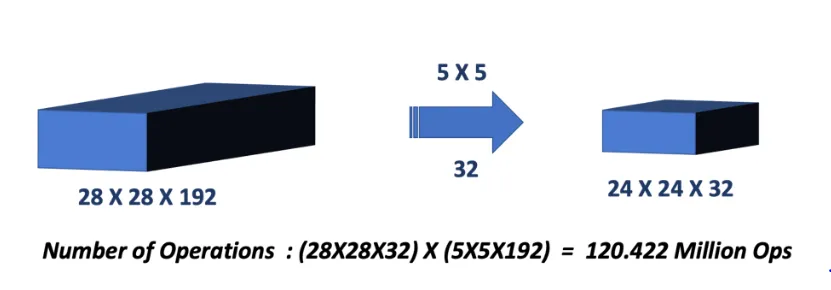

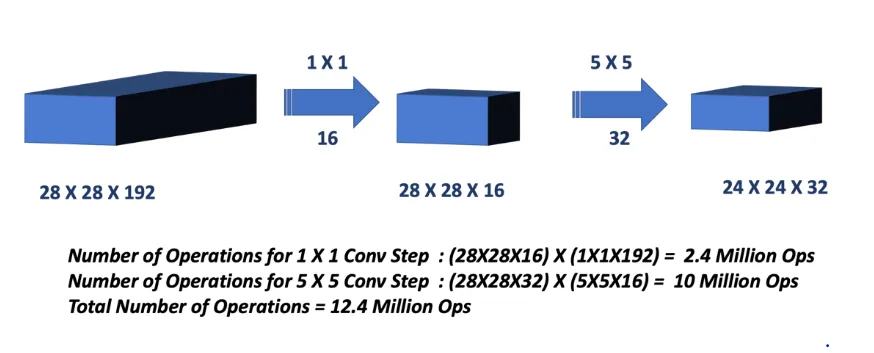

### Inception Blocks

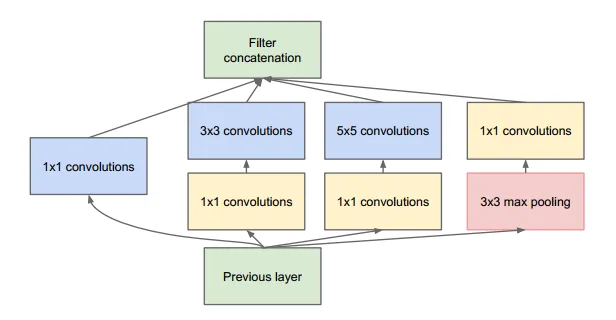
The inception block has it all. It has 1x1 convolutions followed by 3x3 convolutions, it has 1x1 convolutions followed by 5x5 convolutions, it has a 3x3 max pool layer followed by a 1x1 convolutions and it has a single 1x1 convolution. The idea is that if we use all the convolutions and pooling in a block, some of them will be efficient enough to extract some meaningful information from the images. To make sure that the image dimensions are maintained, the 3x3 convolutions have a padding of 1, and the 5x5 layer has a padding of 2 so that the input and the output images have the same size. And finally, they are all stacked together.

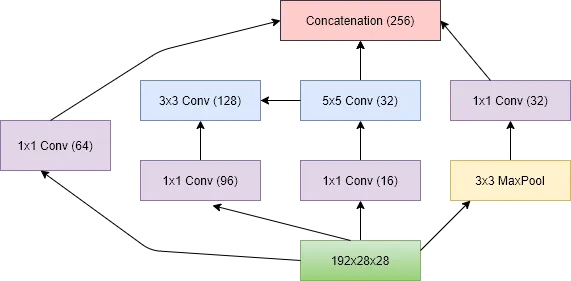
The number of filters in each layer in the Inception blocks are designed in such a way that we get the desired number of channels as the output for the next block. For example, in the first inception block, as shown in Figure 3, the total number of channels add up to 256.

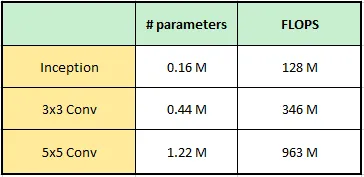
The Inception blocks are designed in such a way that they need fewer parameters and less computational complexity than a single 3x3 or 5x5 convolutional layer, as shown in Table 1. If we were to have 256 channels in the output layer, Inception needs only 16,000 parameters and costs only 128 Mega FLOPS, whereas a 3x3 convolutional layer will need 44,000 parameters and cost 346 Mega FLOPS, and a 5x5 convolutional layer will need 1,22,000 parameters and cost 963 Mega FLOPS. So Inception blocks, essentially get the same job done as single convolutional layers, with much better memory and compute efficiency.

### Steps of Inception

**1. Input Layer:**
* Input Size: Varies, but commonly 224 x 224 x 3 (RGB image)
* Description: The input layer receives a color image resized to the required dimensions.

**2. Initial Convolution and Pooling Layers:**
* Conv1: 7x7 convolutions with 64 filters, stride 2, and padding 3, followed by ReLU activation.
* Pooling: 3x3 max pooling with stride 2.
* Normalization: Local Response Normalization (LRN).

**3. Second Convolution and Pooling Layers:**
* Conv2: 1x1 convolutions with 64 filters, followed by ReLU.
* Conv3: 3x3 convolutions with 192 filters, stride 1, and padding 1, followed by ReLU.
* Pooling: 3x3 max pooling with stride 2.

**4. Inception Modules:**
* Each Inception module has parallel paths with different filter sizes and pooling operations.
    * 1x1 Convolution: Captures fine details.
    * 3x3 Convolution: Captures medium-sized features.
    * 5x5 Convolution: Captures larger features.
    * 3x3 Max Pooling: Reduces spatial dimensions while retaining important features.
* The outputs of these parallel operations are concatenated to form the output of the Inception module.

**5. Auxiliary Classifiers:**
* To improve convergence and mitigate the vanishing gradient problem, auxiliary classifiers are added to intermediate layers.
* These classifiers are smaller networks that consist of average pooling, convolutions, fully connected layers, and a softmax output.
* They provide additional gradient signals during training and are discarded during inference.

**6. Fully Connected Layers:**
* After a series of Inception modules, the output is flattened.
* A global average pooling layer is applied, followed by fully connected layers.
* The final layer uses softmax activation to produce class probabilities.

### Activation Function Used in Inception
* ReLU (Rectified Linear Unit):
    * Used after each convolutional layer.
    * Formula: ReLU(x)=max(0,x)
    * Advantages: Introduces non-linearity, mitigates the vanishing gradient problem, and accelerates convergence.

### Methods to Avoid Overfitting in Inception

**1. Dropout:**
* Applied in fully connected layers with a typical rate of 0.4 to 0.5.
* Prevents neurons from co-adapting too much by randomly setting a fraction of activations to zero during training.

**2. Data Augmentation:**
* Randomly cropping, flipping, and altering the brightness and contrast of training images.
* Increases the diversity of the training data and helps the model generalize better.

**3. Auxiliary Classifiers:**
* Provide additional regularization and gradient signals during training, helping to improve convergence and reduce overfitting.

### Advantages of Inception

**1. Multi-Scale Feature Learning:**
* Captures features at multiple scales simultaneously, leading to rich and diverse feature representations.

**2. Efficient Computation:**
* Uses 1x1 convolutions to reduce dimensionality and computational cost.
* Optimized for both performance and efficiency.

**3. Improved Performance:**
* Achieved state-of-the-art results on the ImageNet challenge, demonstrating its effectiveness in large-scale image recognition.

**4. Auxiliary Classifiers:**
* Help improve convergence and provide regularization during training.

### Disadvantages of Inception

**1. Complexity:**
* The architecture is relatively complex, with many parallel operations within each Inception module.
* Requires careful design and tuning of hyperparameters.

**2. Training Time:**
* Due to its depth and complexity, training Inception networks can be time-consuming and requires significant computational resources.

**3. Parameter Count:**
* Despite using 1x1 convolutions to reduce dimensionality, the network still has a large number of parameters, making it memory-intensive.